<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 1, semester 2</center>
<center>Author: Aline Lefebvre-Lepot</center>

# Polynomial approximation of functions in one variable

&nbsp;

<img src="./figures/Abstract.png" alt="ApproxFct" style="width: 500px;"/>

&nbsp;

<div markdown=1 class=Abstract> XXX

## Table of contents

- [Introduction](#intro)
- [Lagrange interpolation of functions](#Lagrange)
- [Piecewise Interpolation](#PiecewiseInterp)
- [Least square approximation](#LeastSquare)

In [1]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

<a id="intro"></a>
## Introduction

Def pb + Case Study 

idées
- estimation de paramètres pour modèles linéaires 
    - modèle CAPM, least square (Pamela)
    - Loi de Moore (avec lagrange et least square)
- tendance de données bruitées
    - finance (least square) quarteroni p 57 (trouver data)
- compléter données (comparer Lagrange et affine/morceaux)
    - Climatologie: temerature vs carbone, completer données (avec lagrange et affine/morceaux ?) quarteroni p57
    - densité eau mer vs T, completer données  quarteroni exo 3.6 p 81
    - compléter données avec tableau population


<a id="Lagrange"></a>
## Lagrange interpolation

<img src="figures/Lagrange.jpg" alt="Lagrange" style="width: 200px;"/>
  
>**Lagrange (???-???).**
>bla bla

### Existence and uniqueness of the Lagrange polynomial

First, suppose you have data set of $n+1$ data points $(x_k,y_k)_{0\leq k\leq n}$ and you want to compute a polynomial $P$ such that $P(x_k)=y_k$. 

One can prove that for any dataset of $n+1$ data point, there exists a unique polynomial of degree at most $n$ ...

<div  markdown=1 class="Ex"> dg 0, 1 and 2

<div  markdown=1 class="Thm">  Let $x_0, x_1, \cdots, x_n \in [a,b]$ a set of **interpolation points (the nodes)** with distinct nodes $x_k$, and $y_0,y_1,\cdots,y_n$ a set of arbitrary **real numbers**. There exists a unique real polynomial $p_n$ of degree at most $n$ such that, $p_n(x_i) = y_i$ for all $0 \leq i \leq n.$ This polynomial is explicitly given by 

$$p_n(x) = \sum_{i=0}^n y_i L_i(x)$$

where $(L_i)_i$ are the elementary *Lagrange interpolation* polynomial given by 

$$ L_i(x) = \prod_{j \neq i}\frac{x - x_j}{x_i - x_j}, \quad 0 \leq i \leq n$$

> **Proof.** 

<div  markdown=1 class="Rmk"> Can be proved using Vandermonde matrix

### Computation of the Lagrange polynomial

In one wants to use the Van der Monde matrix to compute the coefficients of the Lagrange polynomial, one needs to perform the inversion of a $n\times n$ matrix. This requires $O(n^3)$ operations. (+ ill conditionned ??). The next method we will study only requires $O(n^2)$ operations to compute the coefficients.

<div  markdown=1 class="Def"> **Divided differences**

Let $(x_i,y_i)_{0 \leq i \leq N}$ a family of points. The divided differences are defined by the following recursive formula: 

\begin{align}
\delta^0y[x_i] &= y_i \\
\delta^1y[x_i,x_i+1] &= \frac{\delta^0y[x_{i+1}] - \delta^0y[x_i]}{x_{i+1} - x_i} \\
\delta^2y[x_i,x_{i+1},x_{i+2}] &= \frac{\delta^1y[x_{i+1},x_{i+2}] - \delta^1y[x_i,x_{i+1}]}{x_{i+2} - x_i} \\
\delta^ky[x_i,\cdots,x_{i+k}] &= \frac{\delta^{k-1}y[x_{i+1},\cdots,x_{i+k}] - \delta^{k-1}y[x_i,\cdots,x_{i+k-1}] }{x_{i+k} - x_i}
\end{align}

<div  markdown=1 class="Thm"> The Lagrange polynomial associated to $(x_k)_k$ and $(y_k)_k$ is given by 

$$P(x) = \delta^0y[x_0] + (x-x_0)\delta^1y[x_0,x_1] + (x-x_0)(x-x_1)\delta^2y[x_0,x_1,x_2] + \cdots + \\(x-x_0)(x-x_1)\cdots(x-x_{n-1})\delta^{n}y[x_0,\cdots,x_n].$$

> **Proof.** For $n=0$, the result is obvious. Let us assume that the result is true for $n-1$, let's show that it also holds for $n$. Let $P_n$ the Lagrange polynomial associated to $(x_k,y_k)_{0 \leq k \leq n}$ (remember $P_n$ is of degree at most $n$). Consider the Lagrange polynomials $P_{n-1}$ and $Q_{n-1}$ associated respectively to $(x_k,y_k)_{0 \leq k \leq n-1}$ and $(x_k,y_k)_{1 \leq k \leq n}$. Let $R_n$ and $S_n$ the two polynomials of degree at most $n$ such that 
>
>$$P_{n}(x) = P_{n-1}(x) + R_n(x) = Q_{n-1}(x) + S_n(x).$$
>
> By definition of the Lagrange polynomials, we see that $R_n(x) = P_{n+1}(x) - P_n(x)$ vanishes at $x = x_0, \cdots, x_{n-1}$, thus, since $R_n$ is of degree at most $n$, there exists a constant $a_R$ such that 
>
>$$R_n(x) = a_R(x-x_0)\cdots (x-x_{n-1}).$$
>
> Similarly, there exists a constant $a_S$ such that 
>
>$$S(x) = a_S(x-x_1)\cdots (x-x_{n}).$$
> 
> Now, observe that $S_n - R_n = Q_{n-1} - P_{n-1}$. The remainder of the proof just consists in identifying the coefficients of oerder $n$ and $n-1$ of these two polynomials. The right-hand side is of degree at most $n-1$ which implies that $S_n$ and $R_n$ must have the same coefficient of order $n$, that is 
>
> $$a_R = a_S,$$
> 
> which we now call $a$. We can thus write 
>
>$$S_n(x) - R_n(x) = a(x-x_1)\cdots(x-x_{n-1}) \left[(x - x_0) - (x-x_n)\right].$$
> 
> Matching the coefficient of order $n-1$ of $S_n - R_n$ with that of $P_{n-1} - Q_{n-1}$ now yields, according to the reccurence hypothesis:
>
>$$a(x_n - x_0) = \delta^{n-1}y[x_1,\cdots,x_n] - \delta^{n-1}y[x_0,\cdots,x_{n-1}].$$
> 
> Therefore $a = \delta^{n}y[x_0,\cdots,x_n]$ and using $P_n = P_{n-1} + R$, we get 
> 
> $$ P_n(x) =  \delta^0y[x_0] + (x-x_0)\delta^1y[x_0,x_1] + (x-x_0)(x-x_1)\delta^2y[x_0,x_1,x_2] + \cdots + \\(x-x_0)(x-x_1)\cdots(x-x_{n-1})\delta^{n}y[x_0,\cdots,x_n]$$
>
> as intended

Using this formula, we can again a modified *Hörner-like* scheme to evaluate the Lagrange polynomial, by rewriting: 

$$\begin{eqnarray} 
P(x) &=& \delta^0y[x_0] \\
&& + (x-x_0) \left( \delta^1y[x_0,x_1]\right.\\
&& + (x-x_1) \left(\delta^2y[x_0,x_1,x_2]\right.\\
&& + \cdots\\
&& + (x-x_{n-1})\left.\left. \delta^ny[x_0,\cdots,x_n]\right)\right)\end{eqnarray}$$

that allows to compute the value of $P$ at $X$ in $O(n)$ operations. That is, with this method, the cost for obtaining the coefficients is $0(n^2)$ (instead of $O(n^3)$ for the Van der Monde method), and $0(n)$ for evaluating the polynomial (as in the Van der Monde method). 

Example of computation of Lagrange polynomials are proposed below. First, we implement the function computing the values of a given polynomial using the *Hörner-like* scheme:

$$
P(x)= a_0 + (x-x_0)\,\times\, (a_1 \,+\, (x-x_1)\,\times\, (a_2\, +\, \ldots\, +\,(x-x_{n-1})\,a_{n})
$$

In [2]:
## XXXXXXX INPUT / OUTPUT XXXXXXXXXX
def eval_Horner(a,x,X):
    N = a.size
    R = a[-1]
    for k in range(1,N):
        R = R * (X - x[-k])
        R = R + a[-1-k]
    return R

To compute the coefficients $(\delta^ky[x_0,\cdots,x_k])_{k=0..n}$ of Lagrange polynomial, we introduce an intermediate vector $\delta^k$ that will be computed step by step: 

$$\delta^k = (\delta^0y[x_0],\delta^1y[x_0,x_1],\delta^2y[x_0,x_1,x_2],\cdots,\delta^ky[x_0,\cdots,x_k],\delta^ky[x_1,\cdots,x_{k+1}],\dots,\delta^ky[x_{n-k},\cdots,x_n])$$

Note that the coefficients of the polynomial are given by $\delta^n$. Moreover, from the definition of the divided differences, we see that $\delta^0 = y$ and that $\delta^{k+1}$ can be computed from $\delta^k$ from

$$
\begin{eqnarray}
\forall i \leq k,  \quad\delta^{k+1}[i] &=& \delta^k[i], \\
\forall i>k,  \quad \delta^{k+1}[i] &=& \delta^{k+1}y[x_{i-k-1},\cdots,x_i] \\
&=& \frac{\delta^{k}y[x_{i-k},\cdots,x_i] - \delta^k y[x_{i-k-1},\cdots,x_{i-1}]}{x[i] - x[i - k - 1]} \\
&=& \frac{\delta^k[i] - \delta^k[i-1]}{x[i] - x[i-k-1]}
\end{eqnarray}
$$

The code below computes the vector $\delta^n$ for a given set of data $(x_k,y_k)$.

In [3]:
## XXXXXXX INPUT / OUTPUT XXXXXXXXXX
def divided_diff(x, y):
    n = x.size
    deltak = y.copy() # Use copy to prevent the values in y from being modified 
    for k in range(1,n):
        deltak[k:] = (deltak[k:] - deltak[k-1:-1])/(x[k:] - x[:-k])
    return deltak

We now define the function computing the values on a given set of $N$ points $(X_i)_{i=0..N-1}$ of the Lagrange polynomial for the dataset $(x_k,y_k)_{k=0..n}$ .

In [4]:
## XXXXXXX INPUT / OUTPUT XXXXXXXXXX
## XXXXXXX RETIRER DELTA DE OUTPUT SI ON L'UTILISE PAS DS LA SUITE XXXXXXXXXX
def LagrangeInterp(x, y, X):
    delta = divided_diff(x, y)
    R = eval_Horner(delta, x[:-1], X)
    return (R, delta)

We can now test this function for different datasets.

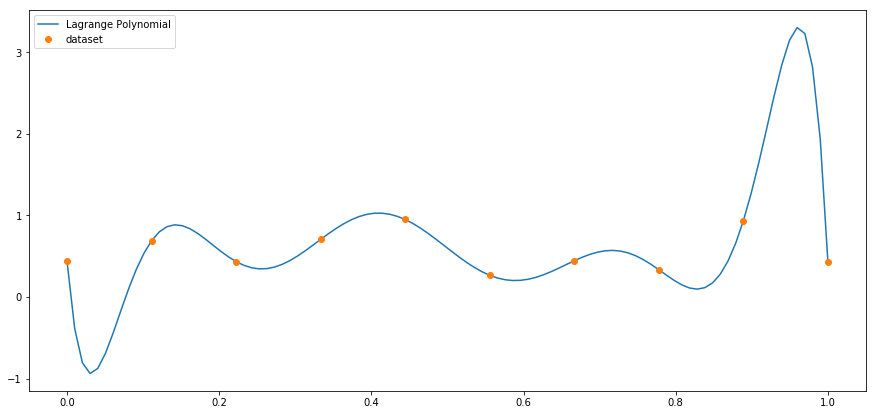

In [5]:
n = 10   # number of points in the data set
x = np.linspace(0,1,n)   # values for (x_k)
y = np.random.random_sample((n,))  # random values for (y_k), uniform in [0,1]
X = np.linspace(0,1,10*n)  # values of x where the lagrange polynomial has to be computed

PX, delta = LagrangeInterp(x, y, X)  # computes the values of the polynomial at point X and its coefficients

# plot
fig = plt.figure(figsize = (15,7))
plt.plot(X,PX,label="Lagrange Polynomial")
plt.plot(x,y,marker='o',linestyle='',label="dataset")
plt.legend()
plt.show()

### Approximating a function: estimation of the error

In the previous section, we presented the way to compute the polynomial with lower degree interpolating a dataset $(x_k,y_k)_{k=0..n-1}$. 

Suppose now that, for all $k$, the value $y_k$ is the values of a given function $f$ at the node $x_k$: $y_k=f(x_k)$. 

Denote by $P_n$ the lagrange polynomial interpolating the dataset $(x_k,y_k)$. The question is to know if  $P_n$ is a good approximation of $f$. More precisely:
- if $P_n$ is used to approximate $f$ for other points than the nodes $x_k$, how confident can we be in the results ?

Another question to be answered is:
- are there a particularly good choices for the nodes  $(x_k)$?

For example, suppose you want to approximate $f(x)=\sin(2\pi x)$ on $[-1,1]$ using Lagrange polynomials. If $P_n$ in the Lagrange polynomial computed from $n$ equidistant nodes in $[-1,1]$, we plot below the interpolant for different values of $n$ and the corresponding local error: 
$$
e_n(x) = |f(x)-P_n(x)|.
$$

In [6]:
## function ploting the Lagrange interpolant and the local error on [-1,1]
## XXXXXXXX INPUTS OUTPUTS  XXXXXXX

def showLagrange(f, x):
    X = np.linspace(-1,1,100)  # points to plot the interpolent and the error
    X = np.sort(np.concatenate((X, x)))     # add the nodes to the plot  
    y = f(x)   # values of f at the nodes
    (PX, delta) = LagrangeInterp(x, y, X)    
    fig = plt.figure(figsize=(20, 7))
    plt.subplot(121)
    plt.plot(X,f(X),label = 'Target function')
    plt.plot(x,f(x),marker='o',linestyle='',label = 'data set')
    plt.plot(X,PX,'--',label='Lagrange polynomial')
    plt.legend()
    plt.title('Lagrange Polynomial vs original function')
    plt.subplot(122)
    plt.plot(X,abs(f(X) - PX))
    plt.plot(x,1e-16*np.ones(x.size),marker='o',linestyle='')
    plt.yscale('log')
    plt.title('Interpolation error in log-scale')
    plt.show()

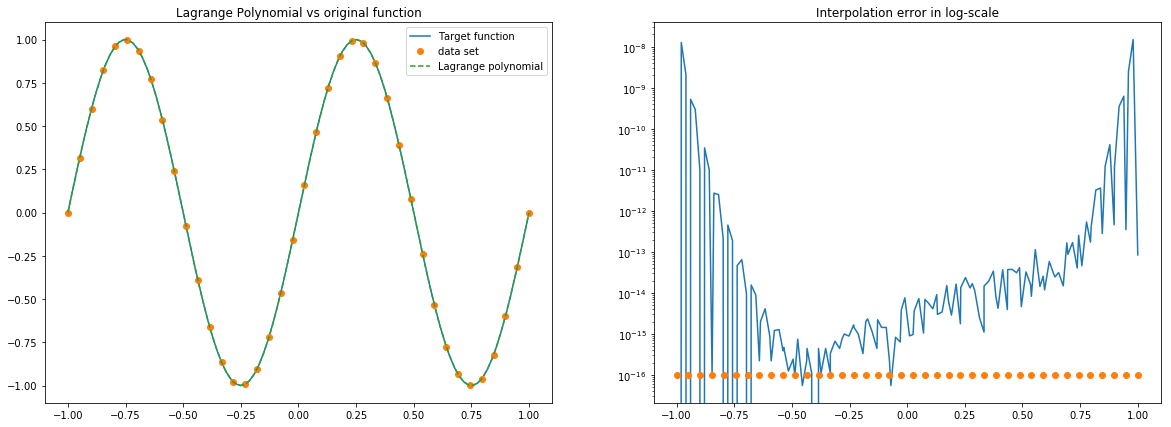

In [7]:
## test for the sine function and equidistant points

def sineWave(x):
    return np.sin(2*pi*x)

n=40
x=np.linspace(-1,1,n)
showLagrange(sineWave,x)


If $f$ is the function to be interpolated, $(x_k)_{0 \leq k \leq n}$ are the interpolation points used and $P_n$ is the corresponding Lagrange polynomial, we can quantify the quality of the approximation using the following error definition. 

$$e(f,(x_k)_k) = \sup_{[a,b]}\lvert f(x) - P_n(x) \rvert$$

We call this the **uniform error**. We study its behaviour when the number of points goes to infinity in the following.

<div  markdown=1 class="Thm">  **Approximation error for the Lagrange polynomial** Let $f : [a,b] \to \mathbb{R}$ be $n+1$ times differentiable and let $P_n$ the Lagrange polynomial associated with the points $(x_i, f(x_i))_{0\leq i \leq n}$. Then, for every $y$ in $[a,b]$, there exists $\xi \in ]a,b[$ such that 

$$f(x) - P_n(x) = (x-x_0)(x-x_1)\cdots(x-x_n) \frac{f^{(n+1)}(\xi)}{(n+1)!}$$

> **Proof.** 

From this theorem, we see that the convergence to zero of the uniform error, depends both on 
- the successive derivatives of $f$
- the estimation of 
$$
\Delta(x_0,\ldots,x_n) = \sup_{[a,b]}\lvert (x-x_0)(x-x_1)\cdots(x-x_n) \rvert
$$
which itself depends on the nodes that has been used for the interpolation. 

In the case of a very regular function, one can deduce the convergence of the interpolants when the number of nodes goes to infinity, whatever the way the nodes are chosen:

<div  markdown=1 class="Thm">  **Convergence for "regular" functions** Let $f : [a,b] \to \mathbb{R}$ be $\cal{C}^\infty$. Suppose that 

$$
\exists M>0, \quad \forall k\geq 0,\quad \sup_{[a,b]} |f^{(k)}| \leq M.
$$

For any $n\in\mathbb{N}$, choose a family of $n+1$ nodes $({x_k}^n)_{0\leq k \leq n}$ in $[a,b]$ and let $P_n$ be the Lagrange polynomial interpolating $f$ at these nodes. Then, the sequence $P_n$ converges uniformly to $f$ on the interval $[a,b]$:

$$\sup_{x\in[a,b]}\,\lvert f(x) - P_n(x) \rvert \longrightarrow 0 \quad\text{when}\quad n\to +\infty$$


> **Proof.** 

The sine function verifies the hypothesis of the previous theorem so that we know that, for example, the previous interpolants on equispaced nodes are converging to the function when the number of points goes to infinity. 

The function $f$ being given, let us define the uniform error 

$$E_{\text{equi}}(n) = \sup_{[a,b]}\lvert f(x) - P_n(x) \rvert$$

where $P_n$ is the Lagrange polynomial approximating $f$ on $[a,b]$ for $n$ equispaced nodes.

We plot the behaviour of $E_{equi}$ versus $n$ in the case of the sine function. Note that, the $\sup$ on $[a,b]$ cannot be computed exaclty and is estimated by the $\sup$ on a set of points $(X_i)_{i=0..N}$ with a big value of $N$.

In [8]:
## function that computes the uniform error on [-1,1] 
## for a given set of values of n and equidistant points
## XXXXXXXX INPUTS OUTPUTS  XXXXXXX

def ErrorEqui(f, nmax):
    ns = np.arange(1,nmax) # values of n to be tested
    Eequi = np.zeros(ns.size) # Pre-allocation
    Xtest = np.linspace(-1,1,200)  # points to compute the uniform error
    for n in ns:
        # loop on n, for each n, compute the uniform error on [-1,1]
        x = np.linspace(-1,1,n)
        y = f(x)
        (PX, delta) = LagrangeInterp(x,y,X)
        Eequi[n-1] = np.max(abs(PX - f(X)))
    return (ns, Eequi)

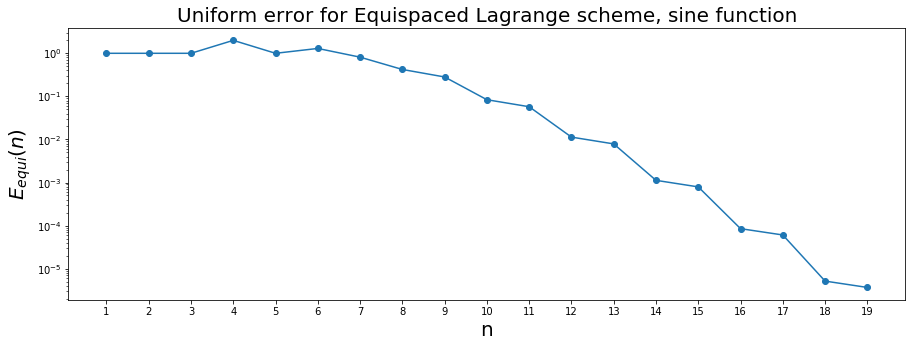

In [9]:
## test for the sine function 
nmax=20
(ns, Eequi) = ErrorEqui(sineWave, nmax)

fig = plt.figure(figsize = (15,5))
plt.semilogy(ns,Eequi,marker='o')
plt.title('Uniform error for Equispaced Lagrange scheme, sine function',fontsize = 20)
plt.ylabel('$E_{equi}(n)$',fontsize = 20)
plt.xlabel('n',fontsize = 20)
plt.xticks(ns)
plt.show()

We observe the convergence to zero of the uniform error when $n$ goes to infinity.

### Approximating a function: Runge phenomenon

<img src="figures/Runge.jpg" alt="Runge" style="width: 200px;"/>
  
>**Runge (???-???).**
>This is called the Runge phenomenon as it was studied by Carl David Tolmé Runge in 1901.

As proved in the previous subsection, the approximation error depends on the behaviour of the successive derivatives of $f$. Let us consider the following function 

$$Runge(x) = \frac{1}{1+25x^2}$$

If we apply Lagrange interpolation on $[-1,1]$ to this function with 10 and 20 equispaced nodes, here is what we get:  

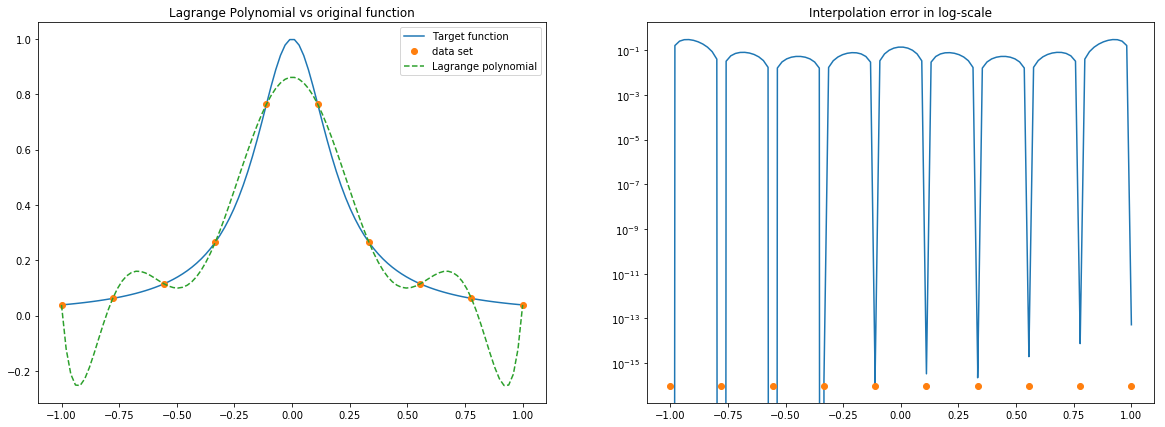

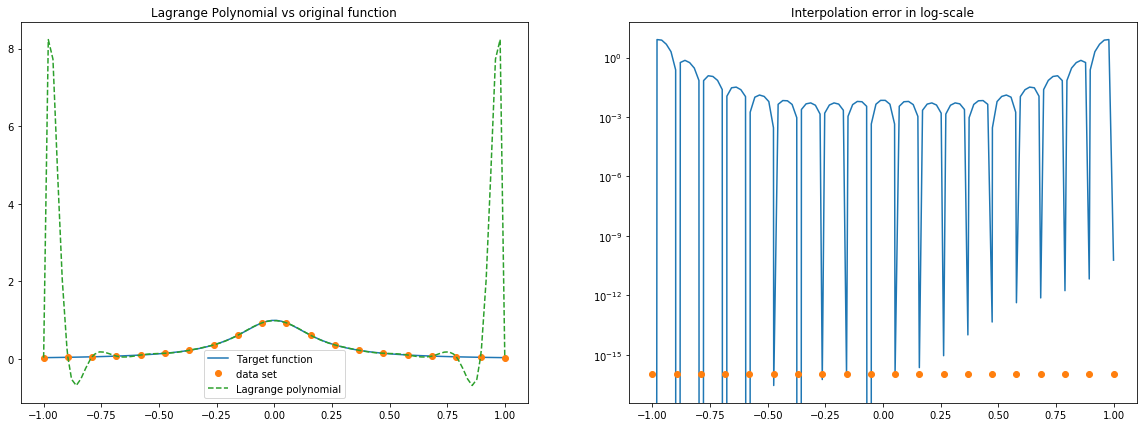

In [10]:
def Runge(x):
    return 1/(1+25*x**2)

n1 = 10; n2 = 20
x1 = np.linspace(-1,1,n1)
x2 = np.linspace(-1,1,n2)
showLagrange(Runge,x1)
showLagrange(Runge,x2)

We can see that high oscillations occur near the edges of the interval and do not seem to decrease as $n$ increases (all the contrary). If we plot for this function the values of the unirform error $E_{equi}(n)$ versus $n$ we obtain: 

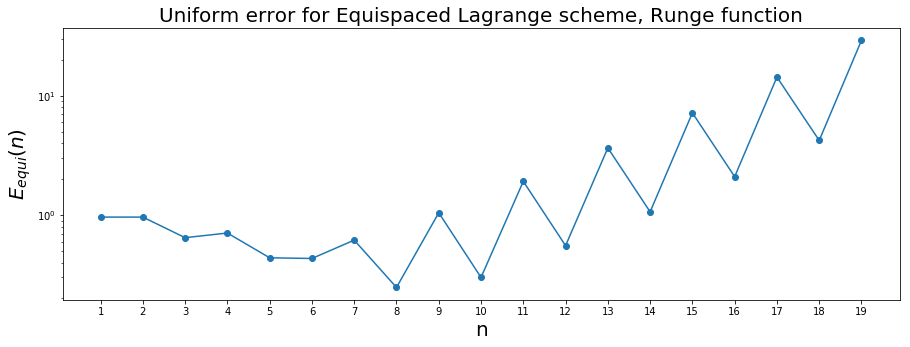

In [11]:
## test for the Runge function 
nmax=20
(ns, Eequi) = ErrorEqui(Runge, nmax)

fig = plt.figure(figsize = (15,5))
plt.semilogy(ns,Eequi,marker='o')
plt.title('Uniform error for Equispaced Lagrange scheme, Runge function',fontsize = 20)
plt.ylabel('$E_{equi}(n)$',fontsize = 20)
plt.xlabel('n',fontsize = 20)
plt.xticks(ns)
plt.show()

This confirms that, for the $Runge$ function, the Lagrange polynomials based on equispaced nodes do not converge uniformly towards the interpolated function.

### Approximating a function: choice for the data points

<img src="figures/Chebychev.jpg" alt="Chebychev" style="width: 200px;"/>
  
>**Chebychev (???-???).**
>In fact, this problem was exactly what lead Chebyshev to introduce his polynomials...

To enhance the quality of the approximation, one can look for better nodes $(x_k)_k$. Recalling the estimation: 

$$f(x) - P_n(x) = (x-x_0)(x-x_1)\cdots(x-x_n) \frac{f^{(n+1)}(\xi)}{(n+1)!}$$

one could choose the points $(x_0, x_1, \cdots, x_n)$ so as to minimize the quantity

$$
\Delta(x_0,\ldots,x_n) = \sup_{[a,b]}\lvert (x-x_0)(x-x_1)\cdots(x-x_n) \rvert
$$

It turns out that the choice of $n$ reals $(x_k)_k$  that achieves this minimum for [a,b] = [-1,1] is wel-known, and is related to the Chebyshev polynomials that we will now introduce.

<div  markdown=1 class="Def"> The Chebyshev polynomial of order $n$ is noted $T_n$ and is defined by recurrence by $T_0(X) = 1$, $T_1(X) = X$ and for all $n$
$$T_{n+1}(X) = 2XT_n(X) - T_{n-1}(X).$$

The Chebychev polynomials verify the following properties (see appendix): 

<div  markdown=1 class="Prop"> Let us consider the Chebyshev polynomial $T_n$ of order $n$. 

- The zeros of $T_n$ are the $n$ distinct points in $]-1,1[$:
$$\hat{x}_k = \cos\left(\frac{(2k + 1)\pi}{2n}\right), \text{for} 0 \leq k \leq n-1$$.

- $T_n(x) = 2^{n-1}(x-\hat{x}_0)\cdots(x-\hat{x}_{n-1})$

- $\lvert T_n \rvert$ reaches its maximal value (equal to $1$) exactly $n+1$ times, at the points $\cos\left(\frac{k\pi}{n}\right), k\in [0,n]$ with

$$T_{n}\left(\cos\left(\frac{2k\pi}{n}\right)\right) = -1, \quad 0\leq 2k \leq n
$$

$$T_{n}\left(\cos\left(\frac{(2k+1)\pi}{n}\right)\right) = 1, \quad 0\leq 2k+1 \leq n
$$

For a given value of $n$, let us denote by $(x_k)_{k=0..n-1}$ the $n$ equispaced points in $[-1,1]$ and let us compare on $[-1,1]$ the two following polynomials:


$$U_n(x) = (x- x_0)(x- x_1)\cdots(x- x_n)$$

$$\hat U_n(x) = \frac{T_n(x)}{2^{n-1}} = (x-\hat x_0)(x-\hat x_1)\cdots(x-\hat x_n) $$


In [12]:
### function computing the zeros of Tn
def xhat(n):
    if n == 0:
        return np.array([])
    else:
        x = np.sort(np.cos(2*np.arange(0,n+1)/(2*n)*np.pi))
        return x

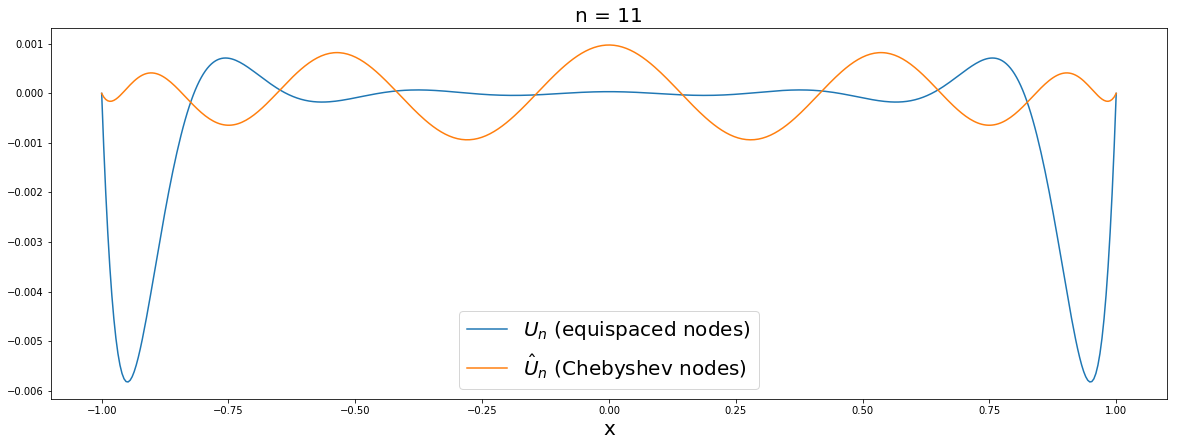

In [13]:
# Plot of the two polynomial on [-1,1]

def evalPolywithRoots(x,X):
    R = 1
    for xi in x:
        R = R*(X-xi)
    return R

n = 11
xequi = np.linspace(-1,1,n+1)
xcheb = xhat(n)
X = np.linspace(-1,1,500)

Un = evalPolywithRoots(xequi,X)
Unhat = evalPolywithRoots(xcheb,X)

figure = plt.figure(figsize = (20,15))
plt.subplot(211)
plt.plot(X,Un,label='$U_n$ (equispaced nodes)')
plt.plot(X,Unhat,label='$\hat U_n$ (Chebyshev nodes)')
plt.xlabel('x',fontsize = 20)
plt.legend(fontsize = 20,loc = 'lower center')
plt.title('n = '+str(n),fontsize = 20)
plt.show()

We observe that the two polynomials oscillates but the oscillations increase at the edges of the interval in the case of equispaced nodes, so that the bound for $|U_n|$ is greater than the one for $|\hat U_n|$. This suggests that interpolation should behave better if based on the Chebychev nodes rather than the equispaced ones.


In fact, for a given value of $n$, the following theorem proves that the Chebychev nodes $(\hat x_0,\ldots,\hat x_n)$ is one of the optimal choices of nodes to minimize $\Delta(x_0,\ldots,x_n)$:

<div  markdown=1 class="Thm"> Let $n \in \mathbb{N}$. For any set of points $(x_0,\ldots,x_n)$ there holds

$$ \Delta(\hat x_0,\ldots,\hat x_n)  \leq \Delta( x_0,\ldots, x_n)$$

> **Proof.** Let $(x_0,\ldots,x_n)$ be a set of points and denote by $P_n$ the polynomial $P_n(x)=(x-x_0)(x-x_1)\cdots(x-x_n)$. We have to prove that
>
>$$
\sup_{x \in [-1,1]} \frac{\lvert T_n(x)\rvert}{2^{n-1}} \leq \sup_{x \in [-1,1]} \lvert P_n(x) \rvert
$$
>
> Assume by contradition that 
> $$\sup_{x \in [-1,1]} \lvert P_n(x)\rvert < \sup_{x \in [-1,1]} \frac{\lvert T_n(x)\rvert}{2^{n-1}} $$
> 
> From this and the properties of $T_n$ we have that, for all $x\in [-1,1]$, $\lvert P_n(x) \rvert < \frac{1}{2^{n-1}}$. 
>
> Let us now consider $D_{n-1}(x) = P_n(x) - \frac{ T_n(x)}{2^{n-1}} $ which is a polynomial of degree at most $n-1$ (since $P_n$ and $  T_n/2^{n-1}$ have the same leading coefficient, $1$). 
> From the bound on $P_n$ and the properties of $T_n$ we have
> - $D_{n-1}\left(\cos\left(\frac{2k\pi}{n}\right)\right) < 0, \quad 0\leq 2k \leq n$
> - $D_{n-1}\left(\cos\left(\frac{2k+1\pi}{n}\right)\right) > 0, \quad 0\leq 2k+1 \leq n$
>
> By the intermediate value theorem, this implies that $D_{n-1}$ must vanish $n$ times. This is not possible since it is a (non-zero) polynomial of degree at most $n-1$. 

Let us plot the interpolant of $Runge$ function for these new Chebychev nodes for $n=10$ and $n=20$ (to be compared to the previous results for equispaces nodes):

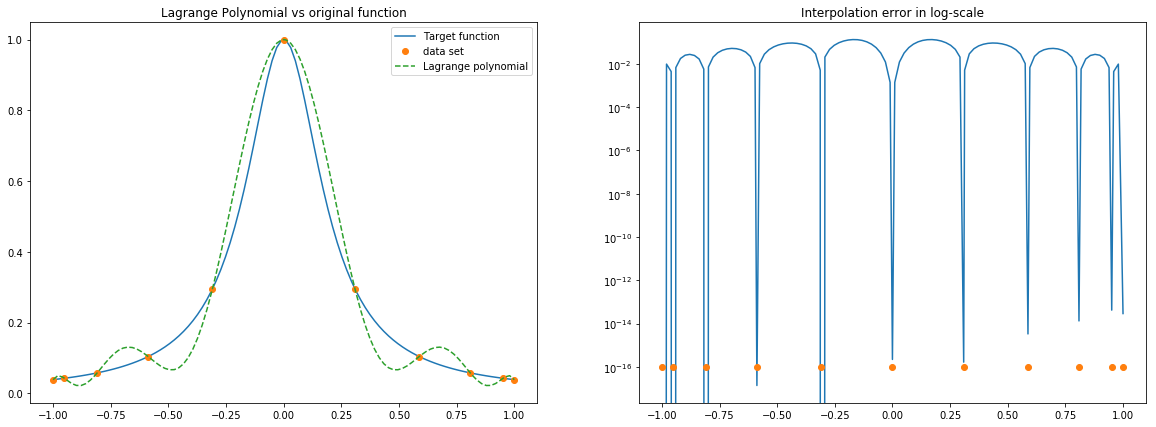

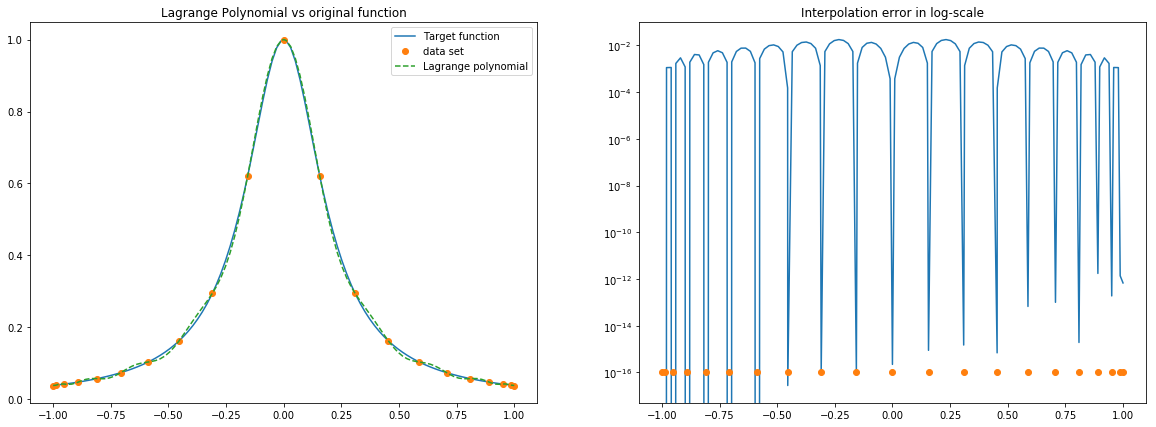

In [14]:
n1 = 10; n2 = 20
x1 = xhat(n1)
x2 = xhat(n2)
showLagrange(Runge,x1)
showLagrange(Runge,x2)

As expected, the behaviour of the interpolant is much better using Chebychev nodes.

We check on the following plot that the uniform error actually behaves better for the Chebychev nodes than the equispaced ones for the sine and Runge functions. 

In [15]:
## function that computes the uniform error on [-1,1] 
## for a given set of values of n chebychev points
## XXXXXXXX INPUTS OUTPUTS  XXXXXXX

def ErrorCheb(f, nmax):
    ns = np.arange(1,nmax) # values of n to be tested
    Echeb = np.zeros(ns.size) # Pre-allocation
    Xtest = np.linspace(-1,1,200)  # points to compute the uniform error
    for n in ns:
        # loop on n, for each n, compute the uniform error on [-1,1]
        x = xhat(n)
        y = f(x)
        (PX, delta) = LagrangeInterp(x,y,X)
        Echeb[n-1] = np.max(abs(PX - f(X)))
    return (ns, Echeb)

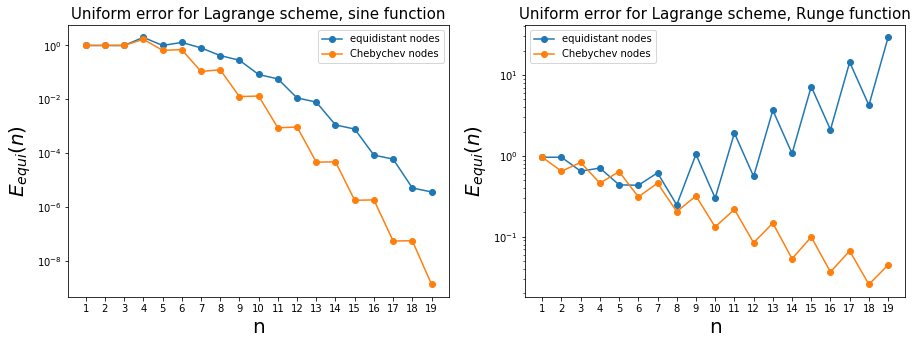

In [16]:
nmax=20

## plot
fig = plt.figure(figsize = (15,5))
# sine function
plt.subplot(121)
(ns, Eequi) = ErrorEqui(sineWave, nmax)
(ns, Echeb) = ErrorCheb(sineWave, nmax)
plt.semilogy(ns,Eequi,marker='o',label='equidistant nodes')
plt.semilogy(ns,Echeb,marker='o',label='Chebychev nodes')
plt.legend()
plt.title('Uniform error for Lagrange scheme, sine function',fontsize = 15)
plt.ylabel('$E_{equi}(n)$',fontsize = 20)
plt.xlabel('n',fontsize = 20)
plt.xticks(ns)
#R unge function
plt.subplot(122)
(ns, Eequi) = ErrorEqui(Runge, nmax)
(ns, Echeb) = ErrorCheb(Runge, nmax)
plt.semilogy(ns,Eequi,marker='o',label='equidistant nodes')
plt.semilogy(ns,Echeb,marker='o',label='Chebychev nodes')
plt.legend()
plt.title('Uniform error for Lagrange scheme, Runge function',fontsize = 15)
plt.ylabel('$E_{equi}(n)$',fontsize = 20)
plt.xlabel('n',fontsize = 20)
plt.xticks(ns)
plt.show()

plt.show()

We already proved that both of the approximation of the sine function converge (since it converges for any choice of nodes). As expected, the convergence for the Chebychev nodes is better.

Concerning the $Runge$ function, as already seen, the equidistant choice does not provide a converging approximation. On the contrary, the interpolant based on the Chebychev nodes is (slowly) uniformly converging for this function.

<div markdown = 1, class = "Rmk"> In theory, although the Chebyshev repartition of roots is better than the equispaced repartition, one can show that there are still some functions for which:

$$\lim_{n \to +\infty}E_{\text{cheb}}(n) = + \infty$$

This means that the Lagrange interpolation method does not aways succeed, even with the Chebyshev nodes.  

In fact, there is no repartition of points that would work for every function. That is, if for each $n$ we choose a set of $n$ points in $[a,b]$, there will always a function $f$ such that, letting $(P_n)_{n}$ the sequence of Lagrange interpolation polynomial of $f$ at these points, 

$$ \lim_{n \to +\infty} \sup_{x \in [a,b]} \lvert f(x) - P_n(x)\rvert = + \infty$$

### Instabilities and Roundoff errors...

One of the drawback of polynomial interpolation is the **instability** of the interpolant. Indeed, suppose that we want to interpolate a function $f$ at points $(x_k)_k$ and suppose that the available values of $f$ at these points are not exact (think for example of noise due to experimental measurements). In that case, we have 
$$ y_k = f(x_k) + \beta_k$$
with $\beta_k$ a small random variable. We observe below the behaviour of the interpolation with the two choices for the nodes (equispaced and Chebychev) 

instabilities: exo 3.8 quarteroni

unstable => sensible to roundoff errors => plot for big values of n for sine function which is supposed to converge...

This (existance of function not converging, whatever is the choice for the nodes), with the numerical instability of the method, limits the range of applications of Lagrange interpolation. In many cases, on wish to have the guarantee that as the number of interpolation points increase, the quality of the approximation tends to zero. This is a feature of Piecewise interpolation that we study next. 

<a id="PiecewiseInterp"></a>
## Piecewise interpolation

XXX

<a id="LeastSquare"></a>
## Least square approximation

XXX

<a id="LeastSquare"></a>
## Appendix

Rolle

Tchebychev

<div  markdown=1 class="Prop"> For all $n \in \mathbb{N}$, the polynomial $T_n$ has the following properties

- It is a plynomial of degree $n$ and if $n\geq 1$ the leading coefficient is $2^{n-1}$.

- For all $\theta \in \mathbb{R},$

$$ T_n(\cos\theta) = \cos(n\theta) $$

- $T_n$ has its $n$ (distincts) roots in $]-1,1[$ given by

$$\hat{x}_k = \cos\left(\frac{2k + 1}{2n}\pi\right), \quad 0 \leq k \leq n-1$$.

- $T_n(x) = 2^{n-1}(x-\hat{x}_0)\cdots(x-\hat{x}_{n-1})$

- For $x\in ]-1,1[$, one has $-1 \leq T_n(x) \leq 1$. If we let $\hat{y}_k = \cos\left(\frac{k\pi}{n}\right)$ for $0\leq k \leq n$, we have

$$-1= \hat{y}_n < \hat{y}_{n-1} < \cdots < \hat{y}_0 = 1 $$

with

$$T_n\left(\hat{y}_k\right) = (-1)^{k}$$

** Leading coefficient** 

By recurrence first we see that $T_0$ is of degree $0$. Moreover, $T_1$ is of degree $1$ and has leading coefficient $2^{1-1} = 1$. Let us show the same result for $n>1$ by recurrence. We assume the result is true for all $k \leq n$. We use 
$$T_{n+1}(X) = 2XT_{n}(X) - T_{n-1}(X).$$
In this equation, the right hand side is the sum of a polynomial of degree $n+1$ and a polynomial of degree $n-1$. Thus, it is of degree $n+1$. Finally, the leading coefficient of $T_{n+1}$ is found by matching the leading coefficients in the two sides of the equality and using the hypothesis of reccurence. 

**Trigonometric identity**: 

we prove this by reccurence. 
$T_0 = 1 = \cos(0\theta)$. Let us assume the result is true for $k\leq n$, and show that it then holds for $k=n+1$. We write 
$$\cos((n+1)\theta)) + \cos((n-1)\theta)) = 2\cos(n\theta)\cos(\theta)$$
We conclude, using the recurrence hypothesis 
$$\cos((n+1)\theta) = 2\cos(\theta) T_n(\cos(\theta)) - T_{n-1}(\theta)$$
and the recursive definition of $T_n$: 
$$\cos((n+1)\theta) = T_{n+1}(\cos(\theta))$$

** Roots**

For $0 \leq k \leq n-1$, we have $0 < \frac{2k+1}{2n}\pi < \pi$. Let's call $\omega_k = \frac{(2k+1)\pi}{2n}$. Then we have $\hat{x}_k = \cos(\omega_k)$ and 

$$0 < \omega_0 < \omega_1 < \cdots < \omega_{n-1} < \pi.$$

Since the $\cos$ function is stricly decreasing on $]0,\pi[$, we deduce 

$$-1 < \hat{x}_{n-1} < \hat{x}_{n-2} < \cdots < \hat{x}_{0} < 1.$$

Therefore, $\hat{x}_k$ are $n$ distinct points in $]-1,1[$. To show that $T_n(\hat{x}_k) = 0$ for all $k$, we use the trigonometric property $T_n(\cos\theta) = \cos(n\theta)$:

$$T_n(\hat{x}_k) = \cos\left(n \frac{2k+1}{2n} \pi\right) = \cos\left(\frac{\pi}{2} + k\pi\right).$$

which vanishes for all $k$. 

** Expression of $T_n$ ** 

Since $T_n$ is of degree $n$, we have now identified all of its roots (the $(\hat{x}_k)_k$) so there exists a constant $C$ such that 

$$T_n(X) = C \left(X - \hat{x}_0\right) \left(X - \hat{x}_1\right)\cdots \left(X - \hat{x}_{n-1}\right).$$

$C$ is the dominant coefficient of $T_n$ so according to the previous, $C = 2^{n-1}$. 

**Extremal values**:

We can show

$$-1= \hat{y}_n < \hat{y}_{n-1} < \cdots < \hat{y}_0 = 1 $$

again using the fact that $\cos$ is a strictly decreasing function. 

Finally, $T_n(\hat{y}_k) =\left(\cos\left(\frac{k\pi}{n}\right)\right) = \cos\left(n\frac{k \pi}{n}\right) = \cos(k\pi) = (-1)^k$.

In [17]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()